In [1]:
#Importar librería pandas y leer datos
import pandas as pd
df = pd.read_csv("C:/Users/patri/challenge_ntt/dataset_SCL.csv", sep = ',', low_memory = False)

In [2]:
#Verificar primeros datos
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [3]:
#Visualizar tipo de datos
df.dtypes

Fecha-I      object
Vlo-I        object
Ori-I        object
Des-I        object
Emp-I        object
Fecha-O      object
Vlo-O        object
Ori-O        object
Des-O        object
Emp-O        object
DIA           int64
MES           int64
AÑO           int64
DIANOM       object
TIPOVUELO    object
OPERA        object
SIGLAORI     object
SIGLADES     object
dtype: object

In [4]:
#Describir datos numéricos
df.describe()

,DIA,MES,AÑO
count,68206.000000,68206.000000,68206.000000
mean,15.714790,6.622585,2017.000029
std,8.782886,3.523321,0.005415
min,1.000000,1.000000,2017.000000
25%,8.000000,3.000000,2017.000000
50%,16.000000,7.000000,2017.000000
75%,23.000000,10.000000,2017.000000
max,31.000000,12.000000,2018.000000


In [5]:
#Fechas a formato correcto
df["Fecha_I2"] = pd.to_datetime(df['Fecha-I'], format="%Y-%m-%d %H:%M:%S")
df["Fecha_O2"] = pd.to_datetime(df['Fecha-O'], format="%Y-%m-%d %H:%M:%S")

In [6]:
df.dtypes

Fecha-I              object
Vlo-I                object
Ori-I                object
Des-I                object
Emp-I                object
Fecha-O              object
Vlo-O                object
Ori-O                object
Des-O                object
Emp-O                object
DIA                   int64
MES                   int64
AÑO                   int64
DIANOM               object
TIPOVUELO            object
OPERA                object
SIGLAORI             object
SIGLADES             object
Fecha_I2     datetime64[ns]
Fecha_O2     datetime64[ns]
dtype: object

In [7]:
#Retraso en días
import numpy as np
df["Retraso"] = (df["Fecha_O2"] - df["Fecha_I2"]) / np.timedelta64(1, 'D')

In [8]:
#Corroboro el cálculo de retraso
df[df["Fecha_O2"] < df["Fecha_I2"]][["Retraso","Fecha_O2","Fecha_I2"]]

,Retraso,Fecha_O2,Fecha_I2
4,-0.001389,2017-01-05 23:28:00,2017-01-05 23:30:00
6,-0.003472,2017-01-07 23:25:00,2017-01-07 23:30:00
7,-0.003472,2017-01-08 23:25:00,2017-01-08 23:30:00
10,-0.006250,2017-01-14 23:21:00,2017-01-14 23:30:00
12,-0.004861,2017-01-18 23:23:00,2017-01-18 23:30:00
...,...,...,...
68181,-0.001389,2017-12-03 16:14:00,2017-12-03 16:16:00
68183,-0.004167,2017-12-17 16:10:00,2017-12-17 16:16:00
68192,-0.003472,2017-12-29 04:00:00,2017-12-29 04:05:00
68195,-0.002778,2017-12-23 04:01:00,2017-12-23 04:05:00


In [9]:
#Corroboro el cálculo de retraso
df[df["Fecha_O2"] > df["Fecha_I2"]][["Retraso","Fecha_O2","Fecha_I2"]]

,Retraso,Fecha_O2,Fecha_I2
0,0.002083,2017-01-01 23:33:00,2017-01-01 23:30:00
1,0.006250,2017-01-02 23:39:00,2017-01-02 23:30:00
2,0.006250,2017-01-03 23:39:00,2017-01-03 23:30:00
3,0.002083,2017-01-04 23:33:00,2017-01-04 23:30:00
5,0.023611,2017-01-07 00:04:00,2017-01-06 23:30:00
...,...,...,...
68201,0.031944,2017-12-22 15:41:00,2017-12-22 14:55:00
68202,0.011111,2017-12-25 15:11:00,2017-12-25 14:55:00
68203,0.027778,2017-12-27 15:35:00,2017-12-27 14:55:00
68204,0.009028,2017-12-29 15:08:00,2017-12-29 14:55:00


In [10]:
#Definición de Performance
df["Bad"] = df["Retraso"] > 0

In [12]:
############################ Distribución de los Datos ################################33
#Descripción de los datos por VLO-I
df.groupby(by = ["Vlo-I"]).count()  
#Existen 584 tipos de vuelos distintos según el código de vuelo

,Fecha-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Fecha_I2,Fecha_O2,Retraso,Bad
Vlo-I,,,,,,,,,,,,,,,,,,,,,
1,407,407,407,407,407,407,407,407,407,407,...,407,407,407,407,407,407,407,407,407,407
10,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
100,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
1003,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1004,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
991,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
993,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [13]:
#Tipos de vuelo por origen y destino
df.groupby(by = ["Ori-I", "Des-I"]).count()  

#El Origen siempre es SCEL y se registran 64 destinos distintos

Fecha-I  Vlo-I  Emp-I  Fecha-O  Vlo-O  Ori-O  Des-O  Emp-O   DIA  \
Ori-I Des-I                                                                     
SCEL  CYYZ       283    283    283      283    283    283    283    283   283   
      EGLL       205    205    205      205    205    205    205    205   205   
      EGYP         1      1      1        1      1      1      1      1     1   
      KATL       358    358    358      358    358    358    358    358   358   
      KDFW       357    357    357      357    357    357    357    357   357   
...              ...    ...    ...      ...    ...    ...    ...    ...   ...   
      SPSO         1      1      1        1      1      1      1      1     1   
      SULS         6      6      6        6      6      6      6      6     6   
      SUMU      1066   1066   1066     1066   1066   1066   1066   1066  1066   
      YMML        38     38     38       38     38     38     38     38    38   
      YSSY       195    195    195      195    195    195    195    195   195   

              MES   AÑO  DIANOM  TIPOVUELO  OPERA  SIGLAORI  SIGLADES  \
Ori-I Des-I                                                             
SCEL  CYYZ    283   283     283        283    283       283       283   
      EGLL    205   205     205        205    205       205       205   
      EGYP      1     1       1          1      1         1         1   
      KATL    358   358     358        358    358       358       358   
      KDFW    357   357     357        357    357       357       357   
...           ...   ...     ...        ...    ...       ...       ...   
      SPSO      1     1       1          1      1         1         1   
      SULS      6     6       6          6      6         6         6   
      SUMU   1066  1066    1066       1066   1066      1066      1066   
      YMML     38    38      38         38     38        38        38   
      YSSY    195   195     195        195    195       195       195   

             Fecha_I2  Fecha_O2  Retraso   Bad  
Ori-I Des-I                                     
SCEL  CYYZ        283       283      283   283  
      EGLL        205       205      205   205  
      EGYP          1         1        1     1  
      KATL        358       358      358   358  
      KDFW        357       357      357   357  
...               ...       ...      ...   ...  
      SPSO          1         1        1     1  
      SULS          6         6        6     6  
      SUMU       1066      1066     1066  1066  
      YMML         38        38       38    38  
      YSSY        195       195      195   195  

[64 rows x 20 columns]

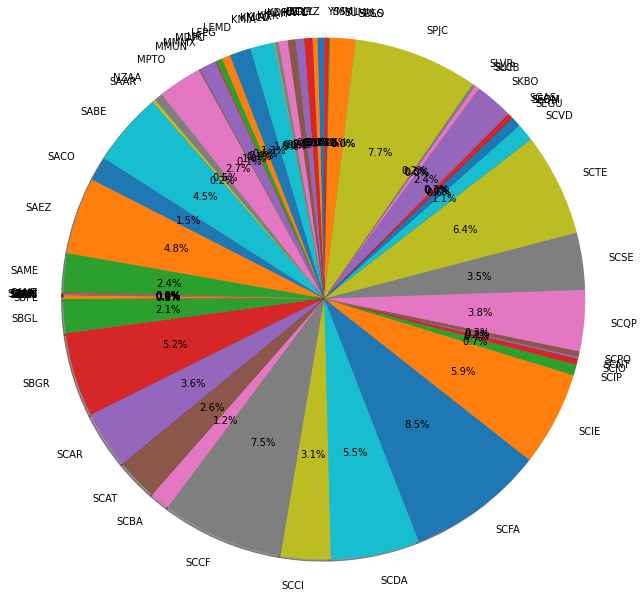

In [24]:
#Destinos
import matplotlib.pyplot as plt
data = np.unique(df['Des-I'], return_counts=True)
plt.pie(x = data[1], autopct='%.1f%%' ,
       labels = data[0],
       #colors =  ["Blue", "Red"],
       shadow = True,
       startangle = 90,
       radius = 3
       )
plt.show()  
#Los destinos principales son SCFA 8,5%, SPJC 7,7% y SCCF con un 7,5% del total de vuelos

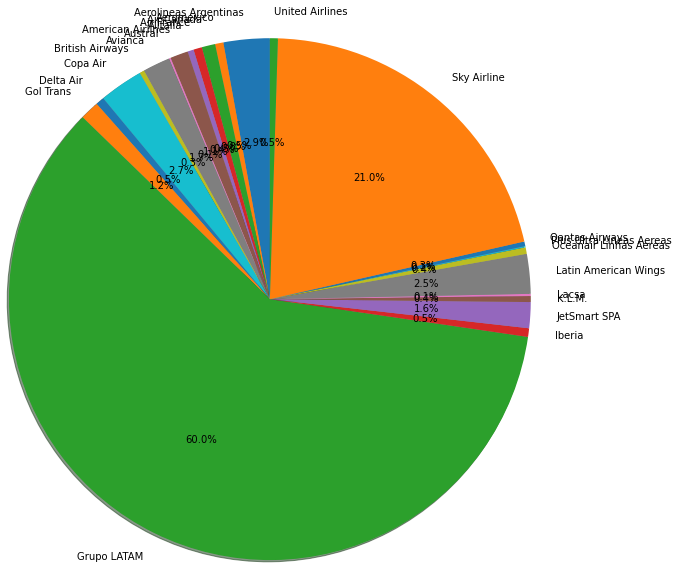

In [31]:
#Aerolineas
import matplotlib.pyplot as plt
data = np.unique(df['OPERA'], return_counts=True)
plt.pie(x = data[1], autopct='%.1f%%' ,
       labels = data[0],
       #colors =  ["Blue", "Red"],
       shadow = True,
       startangle = 90,
       radius = 3
       )
plt.show()  
#Un 60% de los vuelos fue realizado por Grupo Latam, un 21% por Sky Airline y el resto de aerolineas solo un 19% del total

In [43]:
################## 2 synthetic_features.csv 
df['mesdia'] = df["MES"]*100+df["DIA"]
df[["mesdia","MES","DIA"]].head(30)
#df['temporada_alta'] = np.where((df['mesdia'] > 1215 and df['mesdia'] < 1220), 'Alta', 'Baja')
#df[["temporada_alta","mesdia"]].tail(40)

,mesdia,MES,DIA
0,101,1,1
1,102,1,2
2,103,1,3
3,104,1,4
4,105,1,5
5,107,1,7
6,107,1,7
7,108,1,8
8,110,1,10
9,112,1,12


In [97]:
################## 2 synthetic_features.csv 

## Temporada Alta
df['mesdia'] = df["MES"]*100+df["DIA"]
#df[["mesdia","MES","DIA"]]

df['temporada_alta'] = np.where(
     df['mesdia'].between(1215, 1531, inclusive='both'),  1,  #Si está entre el 15 y el 31 de diciembre es temporada alta - Supongo ambas fechas inclusive
     
     np.where(
        df['mesdia'].between(101, 303, inclusive='both'), 1,  #Si está entre el 01 de enero y el 03 de marzo es temporada alta - Supongo ambas fechas inclusive
     
     np.where(
        df['mesdia'].between(715, 731, inclusive='both'), 1,  #Si está entre el 15 y el 31 de julio es temporada alta - Supongo ambas fechas inclusive
     
     np.where(
        df['mesdia'].between(911, 930, inclusive='both'), 1,  #Si está entre el 11 y el 30 de septiembre es temporada alta - Supongo ambas fechas inclusive
         0                                                  #Si no cumple ninguna de las condiciones anteriores entonces no es temporada alta
         
         
     )
)))

#tab = df.groupby(['temporada_alta', 'mesdia']).size() - verificacion
#tab - prueba

##Dif min
df["dif_min"] = (df["Fecha_O2"] - df["Fecha_I2"]) / np.timedelta64(1, 'm')
#df[["dif_min", "Retraso", "Fecha_I2", "Fecha_O2"]] - verificacion

##Atraso 15
df["atraso_15"] = np.where(df["dif_min"] > 15, 1, 0)
#df.groupby(by = ["atraso_15", "dif_min"]).size().head(40)  

##Periodo día
df["horamin"] = pd.to_numeric(df['Fecha_I2'].astype(str).str[11:13])*100  + pd.to_numeric(df['Fecha_I2'].astype(str).str[14:16])
#df[["horamin", "Fecha_I2"]][9000:9010] - verificacion

df["periodo_dia"] = np.where(
     df['horamin'].between(500, 1159, inclusive='both'),  'mañana',  #Si está entre las 5:00 y las 11:59 es de mañana 
     
     np.where(
        df['horamin'].between(1200, 1859, inclusive='both'), 'tarde',  #Si está entre las 5:00 y las 11:59 es de mañana 
     
     np.where(
        df['horamin'].between(1900, 2400, inclusive='both'), 'noche',  #Si está entre las 19:00 y las 24:00 es de noche 
     
     np.where(
        df['horamin'].between(0000, 459, inclusive='both'), 'noche',  #Si está entre las 00:00 y las 4:59 es de mañana 
         'error'                                                  #Si no cumple ninguna de las condiciones anteriores entonces es un error
         
         
     )
)))
#df[["periodo_dia", "horamin", "Fecha-I"]]  - verificacion
#df.groupby(by = ["periodo_dia"]).size() #- verificacion


#Exportar a csv delimitado por |
df.to_csv("C:/Users/patri/challenge_ntt/synthetic_features.csv", index = False,sep = '|', encoding = 'utf-8') #Si quisiera exportar el archivo completo
df[["temporada_alta", "dif_min", "atraso_15", "perio"]].to_csv("C:/Users/patri/challenge_ntt/synthetic_features.csv", index = False,sep = '|', encoding = 'utf-8') #Si quisiera exportar solo las columnas creadas

